In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc


%matplotlib inline

In [34]:
pd.set_option('display.max_columns', None)

In [35]:
data = pd.read_csv('SBA_Loan_Data.csv')
data.head()

,Unnamed: 0,Term,NewExist,GrAppv,SBA_Appv,RevLineCr,LowDoc,NAICS_11,NAICS_21,NAICS_22,NAICS_23,NAICS_31-33,NAICS_42,NAICS_44-45,NAICS_48-49,NAICS_51,NAICS_52,NAICS_53,NAICS_54,NAICS_55,NAICS_56,NAICS_61,NAICS_62,NAICS_71,NAICS_72,NAICS_81,NAICS_92,Approve
0,0,84,2.0,60000,48000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,60,2.0,40000,32000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,2,180,1.0,287000,215250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,5,120,1.0,517000,387750,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,7,84,2.0,45000,36000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [36]:
target = data.Approve

In [37]:
data.drop(['Approve','Unnamed: 0'], axis=1, inplace=True)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(data,target, test_size=0.2, random_state=101)

In [39]:
X_train.head(3)

,Term,NewExist,GrAppv,SBA_Appv,RevLineCr,LowDoc,NAICS_11,NAICS_21,NAICS_22,NAICS_23,NAICS_31-33,NAICS_42,NAICS_44-45,NAICS_48-49,NAICS_51,NAICS_52,NAICS_53,NAICS_54,NAICS_55,NAICS_56,NAICS_61,NAICS_62,NAICS_71,NAICS_72,NAICS_81,NAICS_92
58347,44,2.0,18700,9350,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
426166,48,2.0,30000,27000,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
312301,72,1.0,150000,127500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [40]:
y_train.head(2)

58347     1
426166    1
Name: Approve, dtype: int64

In [41]:
logreg = LogisticRegression()

In [42]:
logreg_grid = LogisticRegression()
logreg_grid.fit(X_train, y_train)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
param_grid_logreg = {
    'max_iter': [100, 200, 300],
}
grid_search_logreg = GridSearchCV(estimator=logreg, param_grid=param_grid_logreg, scoring='roc_auc', cv=5, n_jobs=-1)
grid_search_logreg.fit(X_train, y_train)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'max_iter': [100, 200, 300]}, scoring='roc_auc')

In [44]:
grid_search_logreg.best_params_

{'max_iter': 300}

In [45]:
logreg_grid = grid_search_logreg.best_estimator_

In [46]:
logreg_grid_pred = logreg_grid.predict(X_test)
logreg_grid_proba = logreg_grid.predict_proba(X_test)

In [47]:
print(classification_report(y_test, logreg_grid_pred))

              precision    recall  f1-score   support

           0       0.59      0.31      0.41     19783
           1       0.83      0.94      0.88     72077

    accuracy                           0.81     91860
   macro avg       0.71      0.63      0.65     91860
weighted avg       0.78      0.81      0.78     91860



In [62]:
tnlogreg, fplogreg, fnlogreg, tplogreg = confusion_matrix(y_test, logreg_grid_pred).ravel()
print(confusion_matrix(y_test, logreg_grid_pred))

[[ 6150 13633]
 [ 4252 67825]]


In [48]:
dtc = DecisionTreeClassifier()

In [49]:
dtc_grid = DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_split=20)
dtc_grid.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=20)

In [50]:
param_grid_dtc = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10,15,20],
    'min_samples_split': [2,5,10,20],
}
grid_search_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid_dtc, scoring='roc_auc', cv=5, n_jobs=-1)
grid_search_dtc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='roc_auc')

In [51]:
grid_search_dtc.best_params_

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 20}

In [52]:
dtc_grid = grid_search_dtc.best_estimator_

In [53]:
dtc_grid_pred = dtc_grid.predict(X_test)
dtc_grid_proba = dtc_grid.predict_proba(X_test)

In [54]:
print(classification_report(y_test, dtc_grid_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84     19783
           1       0.96      0.96      0.96     72077

    accuracy                           0.93     91860
   macro avg       0.90      0.90      0.90     91860
weighted avg       0.93      0.93      0.93     91860



In [63]:
tndtc, fpdtc, fndtc, tpdtc = confusion_matrix(y_test, dtc_grid_pred).ravel()
print(confusion_matrix(y_test, dtc_grid_pred))

[[16605  3178]
 [ 3146 68931]]


In [55]:
abc = AdaBoostClassifier()

In [56]:
abc_grid = AdaBoostClassifier(learning_rate=1.0, n_estimators=200)
abc_grid.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=200)

In [57]:
param_grid_abc = {
    'n_estimators': [50, 100,200],
    'learning_rate': [0.5, 1.0, 2.0]
}
grid_search_abc = GridSearchCV(estimator=abc, param_grid=param_grid_abc, scoring='roc_auc', cv=5, n_jobs=-1)
grid_search_abc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.5, 1.0, 2.0],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc')

In [58]:
grid_search_abc.best_params_

{'learning_rate': 1.0, 'n_estimators': 200}

In [59]:
abc_grid = grid_search_abc.best_estimator_

In [60]:
abc_grid_pred = abc_grid.predict(X_test)
abc_grid_proba = abc_grid.predict_proba(X_test)

In [61]:
print(classification_report(y_test, abc_grid_pred))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78     19783
           1       0.94      0.94      0.94     72077

    accuracy                           0.91     91860
   macro avg       0.86      0.86      0.86     91860
weighted avg       0.91      0.91      0.91     91860



In [64]:
tnabc, fpabc, fnabc, tpabc = confusion_matrix(y_test, abc_grid_pred).ravel()
print(confusion_matrix(y_test, abc_grid_pred))

[[15593  4190]
 [ 4409 67668]]


In [65]:
logreg_prob = logreg_grid.predict_proba(X_test)
problogreg = logreg_prob[:,1]
fpr_logreg, tpr_logreg, threshold_logreg = roc_curve(y_test, problogreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

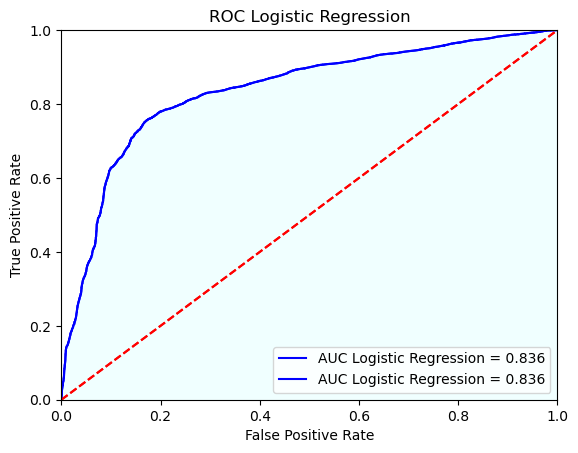

In [67]:
plt.title('ROC Logistic Regression')
plt.plot(fpr_logreg, tpr_logreg, 'blue', label='AUC Logistic Regression = {}'.format(round(roc_auc_logreg,3)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_logreg, tpr_logreg, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')
plt.show()

In [68]:
dtc_prob = dtc_grid.predict_proba(X_test)
probdtc = dtc_prob[:,1]
fpr_dtc, tpr_dtc, threshold_dtc = roc_curve(y_test, probdtc)
roc_auc_dtc = auc(fpr_dtc, tpr_dtc)

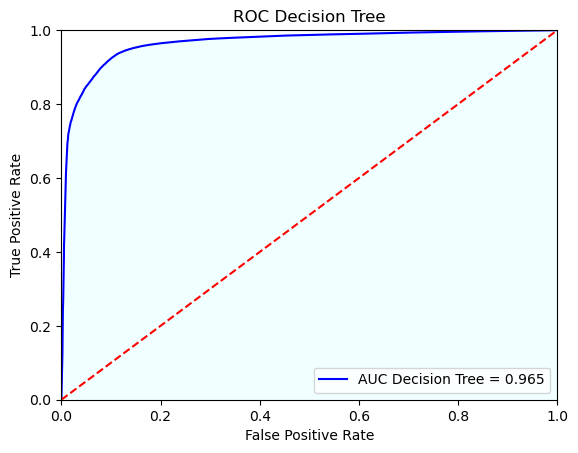

In [69]:
plt.title('ROC Decision Tree')
plt.plot(fpr_dtc, tpr_dtc, 'blue', label='AUC Decision Tree = {}'.format(round(roc_auc_dtc,3)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_dtc, tpr_dtc, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')
plt.show()

In [70]:
abc_prob = abc_grid.predict_proba(X_test)
probabc = abc_prob[:,1]
fpr_abc, tpr_abc, threshold_abc = roc_curve(y_test, probabc)
roc_auc_abc = auc(fpr_abc, tpr_abc)

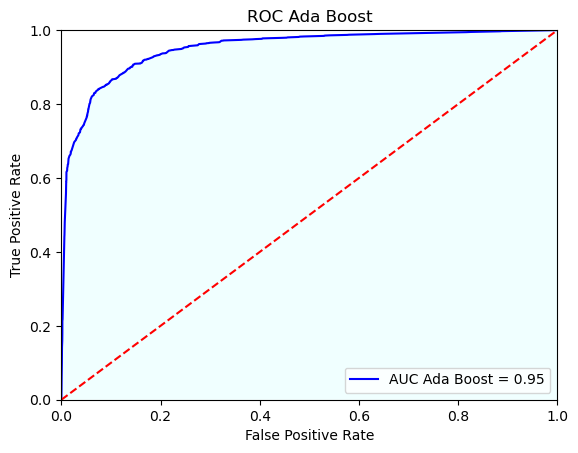

In [71]:
plt.title('ROC Ada Boost')
plt.plot(fpr_abc, tpr_abc, 'blue', label='AUC Ada Boost = {}'.format(round(roc_auc_abc,3)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_abc, tpr_abc, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')
plt.show()

In [72]:
modelComparation = pd.DataFrame({
    "Logistic Regression": [accuracy_score(y_test, logreg_grid_pred),precision_score(y_test, logreg_grid_pred),recall_score(y_test, logreg_grid_pred),f1_score(y_test, logreg_grid_pred), tplogreg, tnlogreg, fplogreg, fnlogreg],
    "Decision Tree": [accuracy_score(y_test, dtc_grid_pred),precision_score(y_test, dtc_grid_pred),recall_score(y_test, dtc_grid_pred),f1_score(y_test, dtc_grid_pred), tpdtc, tndtc, fpdtc, fndtc],
    "Ada Boost": [accuracy_score(y_test, abc_grid_pred),precision_score(y_test, abc_grid_pred),recall_score(y_test, abc_grid_pred),f1_score(y_test, abc_grid_pred), tpabc, tnabc, fpabc, fnabc],
}, index=['Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score', 'True Positive', 'True Negative', 'False Positive', 'False Negative'])
modelComparation

,Logistic Regression,Decision Tree,Ada Boost
Accuracy Score,0.805302,0.931156,0.906390
Precision Score,0.832638,0.955928,0.941691
Recall Score,0.941008,0.956352,0.938829
F1 Score,0.883512,0.956140,0.940258
True Positive,67825.000000,68931.000000,67668.000000
True Negative,6150.000000,16605.000000,15593.000000
False Positive,13633.000000,3178.000000,4190.000000
False Negative,4252.000000,3146.000000,4409.000000


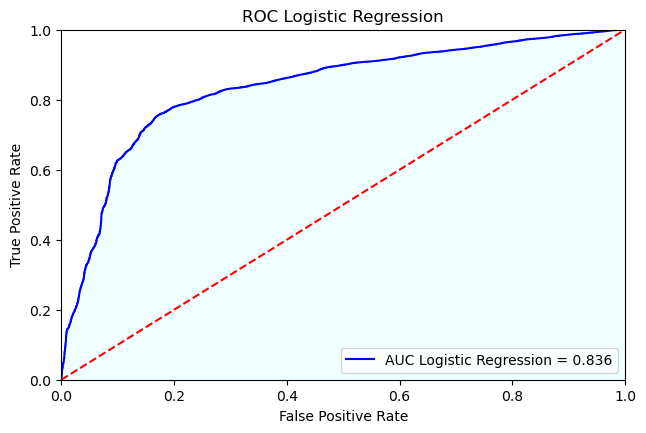

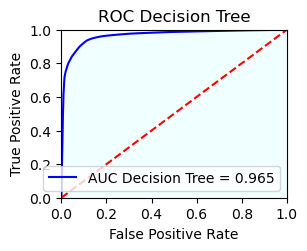

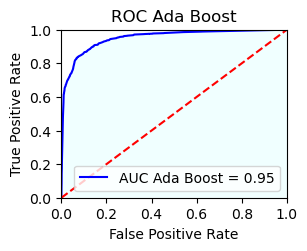

In [73]:
plt.figure(figsize=(16,10))
plt.subplot(221)
plt.title('ROC Logistic Regression')
plt.plot(fpr_logreg, tpr_logreg, 'blue', label='AUC Logistic Regression = {}'.format(round(roc_auc_logreg,3)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_logreg, tpr_logreg, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')
plt.show()

plt.subplot(222)
plt.title('ROC Decision Tree')
plt.plot(fpr_dtc, tpr_dtc, 'blue', label='AUC Decision Tree = {}'.format(round(roc_auc_dtc,4)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_dtc, tpr_dtc, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')
plt.show()



plt.subplot(224)
plt.title('ROC Ada Boost')
plt.plot(fpr_abc, tpr_abc, 'blue', label='AUC Ada Boost = {}'.format(round(roc_auc_abc,3)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_abc, tpr_abc, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')
plt.show()

